In [1]:
# Import libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format


In [26]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models 
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

### EDA

In [4]:
df = df.drop_duplicates()

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.00,96146.00,96146.00,96146.00,96146.00,96146.00,96146.00
mean,41.79,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [7]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [8]:
df['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [9]:
#df = df.drop(columns = 'smoking_history')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.00,0,0,No Info,24.60,4.80,145,0
99996,Female,2.00,0,0,No Info,17.37,6.50,100,0
99997,Male,66.00,0,0,former,27.83,5.70,155,0
99998,Female,24.00,0,0,never,35.42,4.00,100,0


In [10]:
df = df.drop(df[df['gender'] == 'Other'].index)

In [11]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"{column}: {unique_values} unique values")

gender: 2 unique values
age: 102 unique values
hypertension: 2 unique values
heart_disease: 2 unique values
smoking_history: 6 unique values
bmi: 4247 unique values
HbA1c_level: 18 unique values
blood_glucose_level: 18 unique values
diabetes: 2 unique values


In [12]:
df_encode =df.copy()
label_encoder = LabelEncoder()
df_encode['gender']= label_encoder.fit_transform(df['gender'])
df_encode['smoking_history']= label_encoder.fit_transform(df['smoking_history'])
df_encode

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.00,0,1,4,25.19,6.60,140,0
1,0,54.00,0,0,0,27.32,6.60,80,0
2,1,28.00,0,0,4,27.32,5.70,158,0
3,0,36.00,0,0,1,23.45,5.00,155,0
4,1,76.00,1,1,1,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.00,0,0,0,24.60,4.80,145,0
99996,0,2.00,0,0,0,17.37,6.50,100,0
99997,1,66.00,0,0,3,27.83,5.70,155,0
99998,0,24.00,0,0,4,35.42,4.00,100,0


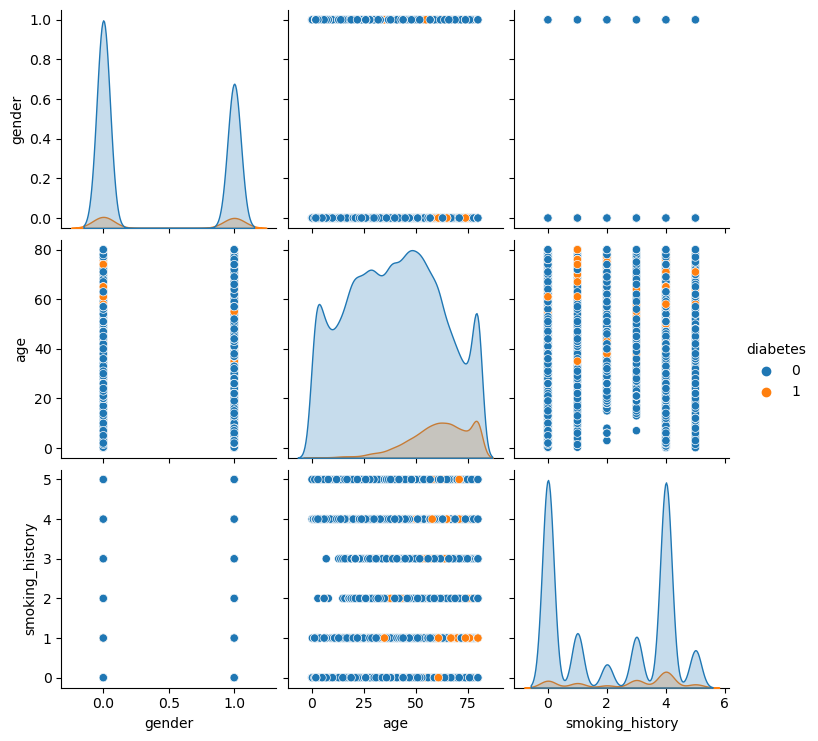

In [13]:
iloced=df_encode.iloc[:, [0, 1,4, -1]]
sns.pairplot(iloced, hue="diabetes")
plt.show()

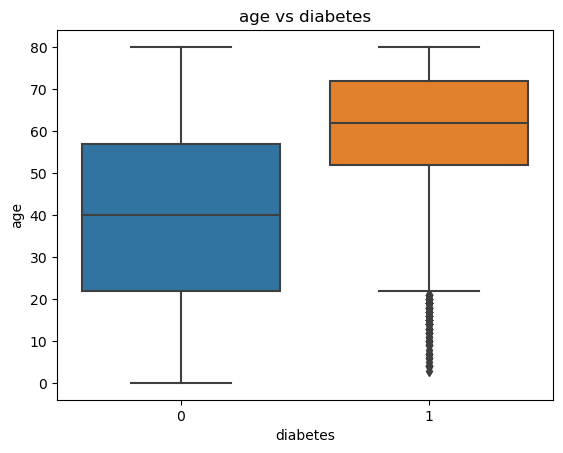

In [14]:
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('age vs diabetes')
plt.show()

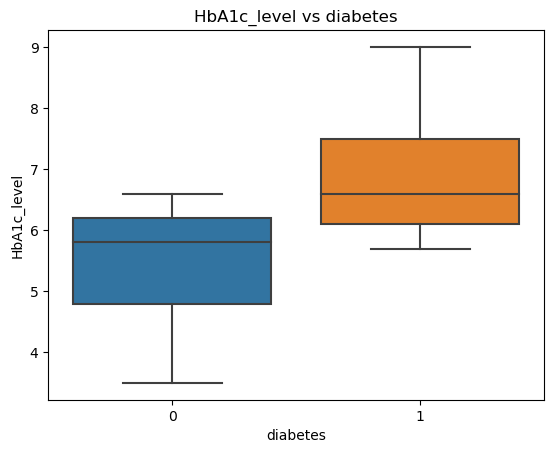

In [15]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c_level vs diabetes')
plt.show()

/tmp/ipykernel_33/1618703472.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


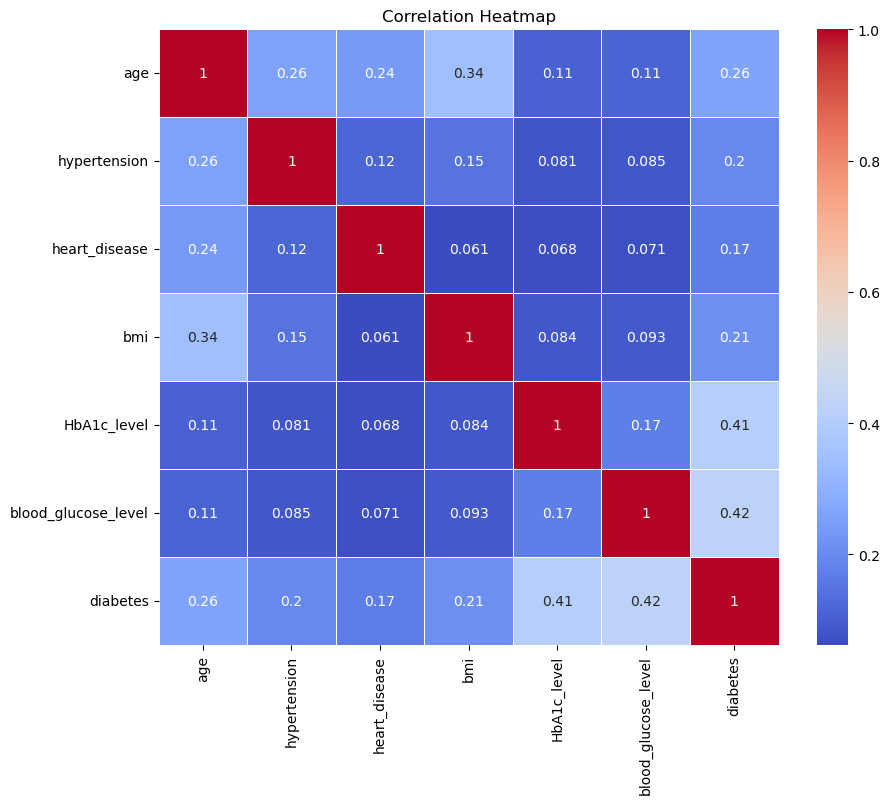

In [16]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Data split 

In [17]:
# Data with smoking history

X = df_encode.drop('diabetes', axis = 1 )
y = df_encode['diabetes']
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.00,0,1,4,25.19,6.60,140
1,0,54.00,0,0,0,27.32,6.60,80
2,1,28.00,0,0,4,27.32,5.70,158
3,0,36.00,0,0,1,23.45,5.00,155
4,1,76.00,1,1,1,20.14,4.80,155
...,...,...,...,...,...,...,...,...
99994,0,36.00,0,0,0,24.60,4.80,145
99996,0,2.00,0,0,0,17.37,6.50,100
99997,1,66.00,0,0,3,27.83,5.70,155
99998,0,24.00,0,0,4,35.42,4.00,100


In [18]:
# Data without smoking history
X_temp = df_encode.drop('diabetes', axis = 1 )
X = X_temp.drop('smoking_history', axis = 1 )
df['gender']= label_encoder.fit_transform(df['gender'])

y = df['diabetes']
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.00,0,1,25.19,6.60,140
1,0,54.00,0,0,27.32,6.60,80
2,1,28.00,0,0,27.32,5.70,158
3,0,36.00,0,0,23.45,5.00,155
4,1,76.00,1,1,20.14,4.80,155
...,...,...,...,...,...,...,...
99994,0,36.00,0,0,24.60,4.80,145
99996,0,2.00,0,0,17.37,6.50,100
99997,1,66.00,0,0,27.83,5.70,155
99998,0,24.00,0,0,35.42,4.00,100


In [19]:
X.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
dtype: object

# Train & Test Split

In [20]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
#X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.4)
#X_test, y_test, X_val, y_val = train_test_split(X_test, y_test, test_size = 0.5)

# XGBoost 

In [22]:
XG_model = XGBClassifier(n_estimators=265,learning_rate=0.1,max_depth = 3,eval_metric='auc')

In [27]:
XG_model.fit(X_train, y_train)
y_pred_proba1 = XG_model.predict_proba(X_test)
print("XGBoost model with X AUC score for h1n1:", roc_auc_score( y_test, y_pred_proba1[:, 1]))

XGBoost model with X AUC score for h1n1: 0.9792547652629031


In [28]:
threshold = 0.5
y_pred_XGB = np.where(y_pred_proba1[:, 1] >= threshold, 1, 0)

# Now you can use the binary labels for classification metrics
from sklearn.metrics import accuracy_score, classification_report

print("Model Accuracy: ", accuracy_score(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))

Model Accuracy:  0.9714449183397482
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17557
           1       0.98      0.69      0.81      1669

    accuracy                           0.97     19226
   macro avg       0.97      0.84      0.90     19226
weighted avg       0.97      0.97      0.97     19226



### Decision Tree

In [29]:
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)
y_pred_DT = classifier.predict(X_test)

In [30]:
print("Model Accuracy: ", accuracy_score(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))

Model Accuracy:  0.9714969312389473
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17557
           1       1.00      0.67      0.80      1669

    accuracy                           0.97     19226
   macro avg       0.98      0.84      0.89     19226
weighted avg       0.97      0.97      0.97     19226



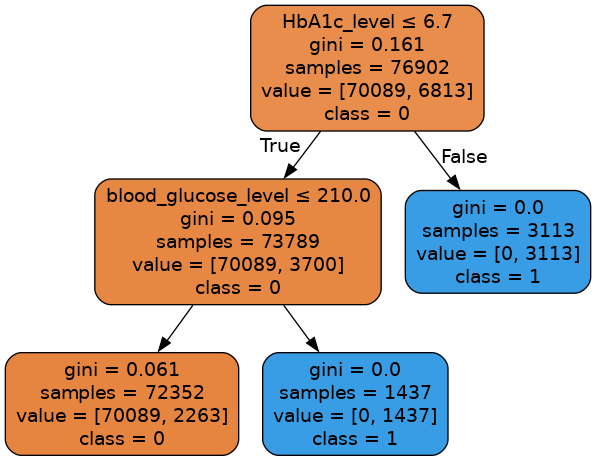

In [31]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

# Convert the class names to strings explicitly
class_names_str = [str(c) for c in y.unique()]

dot_data = export_graphviz(classifier, out_file=None, feature_names=X.columns,
                           class_names=class_names_str, filled=True, rounded=True, special_characters=True)



graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree')

# Oluşturulan ağacın görüntüsünü gösterme
Image("decision_tree.png")

### Random Forest (RF)

In [32]:
random_forest = RandomForestClassifier(n_estimators=256, random_state=42)

In [33]:
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)


In [34]:
threshold = 0.5
y_pred_RF = np.where(y_pred >= threshold, 1, 0)

print("Model Accuracy: ", accuracy_score(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

Model Accuracy:  0.9690523249765942
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17557
           1       0.92      0.70      0.80      1669

    accuracy                           0.97     19226
   macro avg       0.95      0.85      0.89     19226
weighted avg       0.97      0.97      0.97     19226



# DNN

valitation

In [35]:
model = models.Sequential()


In [36]:
model.add(layers.Dense(256, activation='relu', input_dim=7))
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [44]:
# Define a custom learning rate
custom_learning_rate = 0.001

# Compile the model with the Adam optimizer and the custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=custom_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.25)
y_pred = model.predict(X_test)


Epoch 1/20
577/577 [==============================] - 3s 3ms/step - loss: 0.0964 - accuracy: 0.9660 - val_loss: 0.0999 - val_accuracy: 0.9633
Epoch 2/20
577/577 [==============================] - 2s 3ms/step - loss: 0.0944 - accuracy: 0.9670 - val_loss: 0.0983 - val_accuracy: 0.9648
Epoch 3/20
577/577 [==============================] - 2s 3ms/step - loss: 0.0942 - accuracy: 0.9669 - val_loss: 0.1001 - val_accuracy: 0.9635
Epoch 4/20
577/577 [==============================] - 2s 3ms/step - loss: 0.0943 - accuracy: 0.9665 - val_loss: 0.0943 - val_accuracy: 0.9671
Epoch 5/20
577/577 [==============================] - 2s 3ms/step - loss: 0.0935 - accuracy: 0.9671 - val_loss: 0.0939 - val_accuracy: 0.9670
Epoch 6/20
577/577 [==============================] - 2s 3ms/step - loss: 0.0935 - accuracy: 0.9668 - val_loss: 0.0953 - val_accuracy: 0.9670
Epoch 7/20
577/577 [==============================] - 2s 3ms/step - loss: 0.0935 - accuracy: 0.9668 - val_loss: 0.1045 - val_accuracy: 0.9624
Epoch 

In [46]:
threshold = 0.5
y_pred_dnn = np.where(y_pred >= threshold, 1, 0)

print("Model Accuracy: ", accuracy_score(y_test, y_pred_dnn))
print(classification_report(y_test, y_pred_dnn))

Model Accuracy:  0.9701445958597732
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17557
           1       0.97      0.67      0.80      1669

    accuracy                           0.97     19226
   macro avg       0.97      0.84      0.89     19226
weighted avg       0.97      0.97      0.97     19226



In [50]:
# mojority voting
def majority_vote(predictions):
    result = []
    for i in range(len(predictions[0])):
        counts = {}
        for prediction in predictions:
            class_label = prediction[i].item()  # Convert NumPy array to a scalar value
            counts[class_label] = counts.get(class_label, 0) + 1
        majority = max(counts, key=counts.get)
        result.append(majority)
    return result

In [51]:
ensemble_predictions = majority_vote([y_pred_DT, y_pred_RF,y_pred_XGB])

In [52]:
# classifier performance
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble classsifier acc: {accuracy:.5f}")

Ensemble classifier acc: 0.97165


In [53]:
print(classification_report(y_test, ensemble_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17557
           1       0.99      0.68      0.81      1669

    accuracy                           0.97     19226
   macro avg       0.98      0.84      0.90     19226
weighted avg       0.97      0.97      0.97     19226

